In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [8]:

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
from itertools import combinations

In [9]:
import seaborn as sns
sns.set_style("whitegrid")

In [10]:
state = 'NC'

In [11]:
file_symptoms_train = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_train.fea'

noun_sentence_state_train = pd.read_feather(file_symptoms_train)

In [12]:
for col in noun_sentence_state_train.columns:
    print(col)

listingid
qtr
cbsa_div
cbsa
state
Transdate
Transprice
cj_living_area
fips_code
census_tract
zip
ListingPrice
avmValue
avmerror
AVM_Error_List
Listing_Error_List
AVM_Error_Indicators_0
AVM_Error_Indicators_1
AVM_Error_Indicators_2
AVM_Error_Indicators_3
AVM_Error_Indicators_4
AVM_Error_Indicators_5
AVM_Error_Indicators_6
AVM_Error_Indicators_7
AVM_Error_Indicators_8
AVM_Error_Indicators_9
AVM_Error_Indicators_10
AVM_Error_Indicators_11
AVM_Error_Indicators_scale
AVM_Error_Indicators_scale_inverse
Listing_Error_Indicators_0
Listing_Error_Indicators_1
Listing_Error_Indicators_2
Listing_Error_Indicators_3
Listing_Error_Indicators_4
Listing_Error_Indicators_5
Listing_Error_Indicators_6
Listing_Error_Indicators_7
Listing_Error_Indicators_8
Listing_Error_Indicators_9
Listing_Error_Indicators_10
Listing_Error_Indicators_11
transaction_year
AVM_Error_Indicators_0_max_value
AVM_Error_Indicators_0_min_value
AVM_Error_Indicators_0_max_indicator
AVM_Error_Indicators_0_min_indicator
AVM_Error_Indic

original details
beautiful kitchen island
list price
groove ceilings
home pleasure show
ready pets
indoor pool
double front doors
new mirrors
unc charlotte
neighborhood schools
english garden
private lake
gas line grill
whirlpool stainless steel appliances
wolf gas range
real laundry room
interior w
additional upgrades
precious home
efficient floor plan
time summer
peak good
sale price
space garage
spacious feeling
frank betz
kitchen with new appliances
proximity i485
medical district
mile i40
suits needs
functional home
providence downs
pool spa
gorgeous landscape
separate full bath
forest hills
owners suites
trek deck
open floor
small yard
designer backsplash
full bath hallway
deep water
great features home
minutes biltmore park
home steps
granite counters
brazilian cherry hardwoods
private lot backs
white oak crossing
cherry point
final opportunity
possible 5th bedroom
great n
builtins galore
private area
hot tub patio
great possibilities
solar tubes
elegant columns
bronze hardware


beautiful arts
biltmore lake
granite countertops twocar garage
lot creek
large island
unique character
time family friends
high speed internet
long range mountain
elegant moldings
shower master bathroom
private potty room
cute house
peach trees
tons custom
ideal family
huge game room
bonus room 5th bedroom
serene view
huge living
deck area
home inspection
warm wood
wi closet
mi homes
ideal location
month month
bright family room
1st floor owners suite
bottom level
large city lot
basement storage
concrete slab
huge walk storage
level drive
mature oaks
recent upgrades
scrnd prch
perfect flow
big screen tv
day notice
car garage storage room
convenient neighborhood
trader joes
home youve
new 2018
3d tour
peaceful culdesac
great workshop storage
duke hospital
formal rooms
new hvac units
double shower
squirrel lake park
new floorplan
great lot
frameless glass shower
american tobacco trail
french doors
hall closet
public water sewer
additional patio
easy access uptown
homeowners dues
adorable

large den
clubhouse pool
local beaches
master suites
minutes highway
grays creek
garage walls
convenient wake forest
large open foyer
fabulous lot
natural sunlight
great deck
davidson college
office closet
home minutes
perfect privacy
long market
hills mall
efficient kitchen
custom built in cabinets
private views
lafayette village
i485 loop
maple cabinets
tot lot
3car garage
level apartment
large attic storage
large cul
family room wgas logs
road frontage
garage keypad
great living space
historic district
dramatic cathedral
regional airport
family fun
holden beach
laundry basement
nice size closets
perfect 1st time home buyer
durham home
homesite backs
great storage
wireless security system
large mature trees
upstairs boasts
galley style kitchen
patio pergola
playground pond
storage sheds
convenient fort bragg
home office
real gem
kit whwds
feet bragg
quiet living
convenient southpark
fuquay varina
excellent closet space
bright kitchen
media center
middle high schools
new disposal
larg

home overlooks
new wrought
private oceanfront beach club
breakfast nook area
spacious master suite
story ranch home
sunken den
convenient i95
electric heat pump
corner tub
full bath home
carpet downstairs
harris teeter
smooth cook top
natural gas furnace
additional outdoor
large mudroom
low maintenance brick ranch
kitchen lots
hardwoods entry
built in book cases
natural light floods
floor study
carolina lakes
spacious master bath
double sinks
low maintenance vinyl
elegant crown
story transitional
water slide
large secondary bedrooms
computer nook
extra space
great entertainment
main entrance
bonus room garage
spacious sunroom
spacious bedrooms
great room wfp
plenty closets
sprklr system
large vanity
lots counter space
jackjill bath
laundry hookups
kitchen combo
previous model home
mature trees
island kit
open yard
huge workshop
private neighborhood
great view backyard
mobile home
full price
prime location
myers park schools
super location
king bed
additional bedrooms downstairs
amazing

In [13]:
file_symptoms_test = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_test.fea'
noun_sentence_state_test = pd.read_feather(file_symptoms_test)


In [14]:
noun_sentence_state_test_transdate_train = noun_sentence_state_train.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_train = noun_sentence_state_test_transdate_train.rename(columns={"avmerror": "avmerror_mean"})

In [15]:
noun_sentence_state_test_transdate_test = noun_sentence_state_test.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_test = noun_sentence_state_test_transdate_test.rename(columns={"avmerror": "avmerror_mean"})

In [16]:
noun_sentence_state_train = noun_sentence_state_train.merge(noun_sentence_state_test_transdate_train,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [17]:
noun_sentence_state_test = noun_sentence_state_test.merge(noun_sentence_state_test_transdate_test,
                                                         how='left', left_on='Transdate', right_on='Transdate')

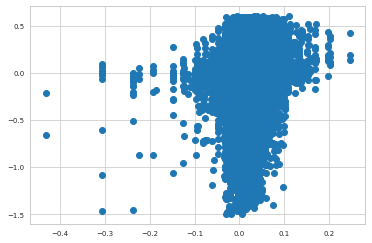

In [18]:

plt.plot(noun_sentence_state_train.avmerror_mean.values,noun_sentence_state_train.avmerror.values,'o')


In [28]:
noun_sentence_state_train['category_predictand'] = 0
noun_sentence_state_train.loc[noun_sentence_state_train['avmerror']>=0.,'category_predictand'] = 1

In [29]:
noun_sentence_state_test['category_predictand'] = 0
noun_sentence_state_test.loc[noun_sentence_state_test['avmerror']>=0.,'category_predictand'] = 1

In [19]:
selcted_columns = ['cbsa', 'Transdate', 
       'cj_living_area', 'census_tract', 'zip', 
       'avmValue']

In [15]:
#selcted_columns = selcted_columns + list(noun_sentence_state_train.columns[51:-1])

In [37]:
selcted_columns = ['cbsa', 'Transdate', 
       'cj_living_area', 'census_tract', 'zip', 
       'avmValue']
all_combinations = []

In [38]:
for i in range(1,len(selcted_columns)+1):
    print(i)
    all_combinations = all_combinations + list(combinations(selcted_columns, i))

1
2
3
4
5
6


In [42]:
for list_preds in all_combinations:
    print(list(list_preds))


['cbsa']
['Transdate']
['cj_living_area']
['census_tract']
['zip']
['avmValue']
['cbsa', 'Transdate']
['cbsa', 'cj_living_area']
['cbsa', 'census_tract']
['cbsa', 'zip']
['cbsa', 'avmValue']
['Transdate', 'cj_living_area']
['Transdate', 'census_tract']
['Transdate', 'zip']
['Transdate', 'avmValue']
['cj_living_area', 'census_tract']
['cj_living_area', 'zip']
['cj_living_area', 'avmValue']
['census_tract', 'zip']
['census_tract', 'avmValue']
['zip', 'avmValue']
['cbsa', 'Transdate', 'cj_living_area']
['cbsa', 'Transdate', 'census_tract']
['cbsa', 'Transdate', 'zip']
['cbsa', 'Transdate', 'avmValue']
['cbsa', 'cj_living_area', 'census_tract']
['cbsa', 'cj_living_area', 'zip']
['cbsa', 'cj_living_area', 'avmValue']
['cbsa', 'census_tract', 'zip']
['cbsa', 'census_tract', 'avmValue']
['cbsa', 'zip', 'avmValue']
['Transdate', 'cj_living_area', 'census_tract']
['Transdate', 'cj_living_area', 'zip']
['Transdate', 'cj_living_area', 'avmValue']
['Transdate', 'census_tract', 'zip']
['Transdate',

In [45]:
from lightgbm import LGBMRegressor

In [46]:
for idd,list_preds in enumerate(all_combinations):
    print(list(list_preds))
    
    selcted_columns = list_preds
    symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]
    symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]
    
    Predictors = symptoms_df.to_numpy()
    X_test = symptoms_df_test.to_numpy()
    X_train = Predictors
    predictand = noun_sentence_state_train.category_predictand.values
    y_train = predictand
    y_test = noun_sentence_state_test.category_predictand.values
    
    y_train_regressor = noun_sentence_state_train.avmerror.values
    
    model_regressor = LGBMRegressor(max_depth = 10, n_estimators = 150, num_leaves = 700, colsample_bytree=0.4) 

    model_regressor.fit(X_train, y_train_regressor)
    
    predictions_train_Regressor = model_regressor.predict(X_train)
    predictions_test_Regressor = model_regressor.predict(X_test)
    
    y_test_regressor = noun_sentence_state_test.avmerror.values
    
    avmValue_test = noun_sentence_state_test['avmValue']
    avmValue_train = noun_sentence_state_train['avmValue']

    transprice_test = noun_sentence_state_test['Transprice']
    transprice_train = noun_sentence_state_train['Transprice']

    predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
    predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)
    
    
    print('') 
    print('Testing')
    print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
              (transprice_test)))
    print(np.mean(np.abs(transprice_test - avmValue_test)/\
                  (transprice_test)))

    print('') 
    print('Training') 
    print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
              (transprice_train)))
    print(np.mean(np.abs(transprice_train - avmValue_train)/\
                  (transprice_train)))   
    
    import joblib
    filename = 'LGBM_regressor_NOCOMMENTS_'+state+'_'+str(idd)+'.sav'
    joblib.dump(model_regressor,filename)
    
    

['cbsa']

Testing
0.11448760138766934
0.11482542789285947

Training
0.11467054016244699
0.11497275549046698
['Transdate']

Testing
0.11469483804375169
0.11482542789285947

Training
0.1146998186343513
0.11497275549046698
['cj_living_area']

Testing
0.11428215422032698
0.11482542789285947

Training
0.11431683319867367
0.11497275549046698
['census_tract']

Testing
0.11405999635494828
0.11482542789285947

Training
0.11427062938357065
0.11497275549046698
['zip']

Testing
0.11428933974590103
0.11482542789285947

Training
0.11437629108399587
0.11497275549046698
['avmValue']

Testing
0.11340020643356702
0.11482542789285947

Training
0.11340262810749041
0.11497275549046698
['cbsa', 'Transdate']

Testing
0.11408781243632234
0.11482542789285947

Training
0.11209659405800543
0.11497275549046698
['cbsa', 'cj_living_area']

Testing
0.11427885643029805
0.11482542789285947

Training
0.11231316276953471
0.11497275549046698
['cbsa', 'census_tract']

Testing
0.11384969422923241
0.11482542789285947

Train


Testing
0.11280486532304924
0.11482542789285947

Training
0.10665998021298932
0.11497275549046698
['Transdate', 'cj_living_area', 'census_tract', 'zip', 'avmValue']

Testing
0.11071262861106418
0.11482542789285947

Training
0.10127653520238136
0.11497275549046698
['cbsa', 'Transdate', 'cj_living_area', 'census_tract', 'zip', 'avmValue']

Testing
0.11103260254996415
0.11482542789285947

Training
0.10307672205559482
0.11497275549046698


In [49]:
for idd,list_preds in enumerate(all_combinations):
    print(list(list_preds))

    selcted_columns = list(list_preds) + ['ListingPrice'] 
    symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]
    symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]
    
    Predictors = symptoms_df.to_numpy()
    X_test = symptoms_df_test.to_numpy()
    X_train = Predictors
    predictand = noun_sentence_state_train.category_predictand.values
    y_train = predictand
    y_test = noun_sentence_state_test.category_predictand.values
    
    y_train_regressor = noun_sentence_state_train.avmerror.values
    
    model_regressor = LGBMRegressor(max_depth = 10, n_estimators = 150, num_leaves = 700, colsample_bytree=0.4) 

    model_regressor.fit(X_train, y_train_regressor)
    
    predictions_train_Regressor = model_regressor.predict(X_train)
    predictions_test_Regressor = model_regressor.predict(X_test)
    
    y_test_regressor = noun_sentence_state_test.avmerror.values
    
    avmValue_test = noun_sentence_state_test['avmValue']
    avmValue_train = noun_sentence_state_train['avmValue']

    transprice_test = noun_sentence_state_test['Transprice']
    transprice_train = noun_sentence_state_train['Transprice']

    predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
    predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)
    
    
    print('') 
    print('Testing')
    print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
              (transprice_test)))
    print(np.mean(np.abs(transprice_test - avmValue_test)/\
                  (transprice_test)))

    print('') 
    print('Training') 
    print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
              (transprice_train)))
    print(np.mean(np.abs(transprice_train - avmValue_train)/\
                  (transprice_train)))   
    
    import joblib
    filename = 'LGBM_regressor_NOCOMMENTS_with_listing'+state+'_'+str(idd)+'.sav'
    joblib.dump(model_regressor,filename)
    
    

['cbsa']

Testing
0.11289037747517315
0.11482542789285947

Training
0.11141823689780816
0.11497275549046698
['Transdate']

Testing
0.11389434245623421
0.11482542789285947

Training
0.11044661799712448
0.11497275549046698
['cj_living_area']

Testing
0.11000501613922321
0.11482542789285947

Training
0.10702739967923904
0.11497275549046698
['census_tract']

Testing
0.11203212044844542
0.11482542789285947

Training
0.10853065124657087
0.11497275549046698
['zip']

Testing
0.11216351597169158
0.11482542789285947

Training
0.10886323229270017
0.11497275549046698
['avmValue']

Testing
0.048680895592224514
0.11482542789285947

Training
0.047111193832070554
0.11497275549046698
['cbsa', 'Transdate']

Testing
0.11173311389220957
0.11482542789285947

Training
0.10785520175647466
0.11497275549046698
['cbsa', 'cj_living_area']

Testing
0.10672269113592683
0.11482542789285947

Training
0.1017165488849212
0.11497275549046698
['cbsa', 'census_tract']

Testing
0.11168845280467726
0.11482542789285947

Tra


Testing
0.06691933422195348
0.11482542789285947

Training
0.061825564949516645
0.11497275549046698
['Transdate', 'cj_living_area', 'census_tract', 'zip', 'avmValue']

Testing
0.06630110014708405
0.11482542789285947

Training
0.05965917670586652
0.11497275549046698
['cbsa', 'Transdate', 'cj_living_area', 'census_tract', 'zip', 'avmValue']

Testing
0.05789372519174789
0.11482542789285947

Training
0.049186858130227246
0.11497275549046698


In [50]:
for idd,list_preds in enumerate(all_combinations):
    print(list(list_preds))

    selcted_columns = list(list_preds) + ['avmerror_mean'] 
    symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]
    symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]
    
    Predictors = symptoms_df.to_numpy()
    X_test = symptoms_df_test.to_numpy()
    X_train = Predictors
    predictand = noun_sentence_state_train.category_predictand.values
    y_train = predictand
    y_test = noun_sentence_state_test.category_predictand.values
    
    y_train_regressor = noun_sentence_state_train.avmerror.values
    
    model_regressor = LGBMRegressor(max_depth = 10, n_estimators = 150, num_leaves = 700, colsample_bytree=0.4) 

    model_regressor.fit(X_train, y_train_regressor)
    
    predictions_train_Regressor = model_regressor.predict(X_train)
    predictions_test_Regressor = model_regressor.predict(X_test)
    
    y_test_regressor = noun_sentence_state_test.avmerror.values
    
    avmValue_test = noun_sentence_state_test['avmValue']
    avmValue_train = noun_sentence_state_train['avmValue']

    transprice_test = noun_sentence_state_test['Transprice']
    transprice_train = noun_sentence_state_train['Transprice']

    predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
    predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)
    
    
    print('') 
    print('Testing')
    print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
              (transprice_test)))
    print(np.mean(np.abs(transprice_test - avmValue_test)/\
                  (transprice_test)))

    print('') 
    print('Training') 
    print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
              (transprice_train)))
    print(np.mean(np.abs(transprice_train - avmValue_train)/\
                  (transprice_train)))   
    
    import joblib
    filename = 'LGBM_regressor_NOCOMMENTS_with_avmerror_mean'+state+'_'+str(idd)+'.sav'
    joblib.dump(model_regressor,filename)

['cbsa']

Testing
0.11471604317306178
0.11482542789285947

Training
0.11234328107722216
0.11497275549046698
['Transdate']

Testing
0.11471267222324295
0.11482542789285947

Training
0.11465380127905823
0.11497275549046698
['cj_living_area']

Testing
0.11490569705806422
0.11482542789285947

Training
0.11039878740810813
0.11497275549046698
['census_tract']

Testing
0.11466148097756391
0.11482542789285947

Training
0.11005289369430107
0.11497275549046698
['zip']

Testing
0.11487074218353019
0.11482542789285947

Training
0.1102460385871795
0.11497275549046698
['avmValue']

Testing
0.11333119095069812
0.11482542789285947

Training
0.1086149311280379
0.11497275549046698
['cbsa', 'Transdate']

Testing
0.1138623036852275
0.11482542789285947

Training
0.11170347847428592
0.11497275549046698
['cbsa', 'cj_living_area']

Testing
0.11380460480478415
0.11482542789285947

Training
0.10889248783120094
0.11497275549046698
['cbsa', 'census_tract']

Testing
0.11405994082920042
0.11482542789285947

Trainin


Testing
0.11139930602695378
0.11482542789285947

Training
0.1034082055823152
0.11497275549046698
['Transdate', 'cj_living_area', 'census_tract', 'zip', 'avmValue']

Testing
0.11068613934375063
0.11482542789285947

Training
0.10191278157309626
0.11497275549046698
['cbsa', 'Transdate', 'cj_living_area', 'census_tract', 'zip', 'avmValue']

Testing
0.10964051482875287
0.11482542789285947

Training
0.09766772151953587
0.11497275549046698


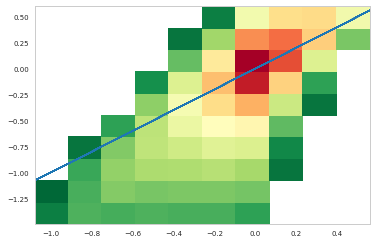

In [27]:
from matplotlib import colors
plt.hist2d(predictions_train_Regressor, y_train_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_train_regressor,y_train_regressor)

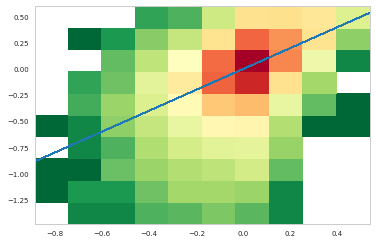

In [30]:
plt.hist2d(predictions_test_Regressor, y_test_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_test_regressor,y_test_regressor)

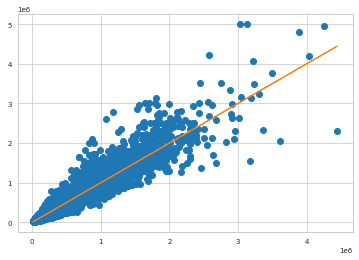

In [32]:


print('') 
fig = plt.figure()
plt.plot(predictions_test_valueR, 
     transprice_test,'o')
plt.plot(predictions_test_valueR,predictions_test_valueR)



Testing
0.10060815707066105
0.11482542789285947

Training
0.08765564973659257
0.11497275549046698


In [57]:
len(noun_sentence_state_train)

193294

In [58]:
len(symptoms_df)

193294

In [93]:
symptoms_df['ListingPrice'] = noun_sentence_state_train['ListingPrice']
symptoms_df_test['ListingPrice'] = noun_sentence_state_test['ListingPrice']


In [94]:
symptoms_df['AVM-LISTING'] = symptoms_df['avmValue']-symptoms_df['ListingPrice']
symptoms_df_test['AVM-LISTING'] = symptoms_df_test['avmValue']-symptoms_df_test['ListingPrice']

In [95]:
X_test_trial3 = symptoms_df_test[trial_columns+['ListingPrice','AVM-LISTING']].to_numpy()
X_train_trial3 = symptoms_df[trial_columns+['ListingPrice','AVM-LISTING']].to_numpy()
y_train_trial3 = noun_sentence_state_train.category_predictand.values
y_test_trial3 = noun_sentence_state_test.category_predictand.values
y_train_trial_regressor3 = noun_sentence_state_train.avmerror.values
y_test_trial_regressor3 = noun_sentence_state_test.avmerror.values

In [96]:
model_regressor_trial3 = LGBMRegressor(max_depth = 7, n_estimators = 500, num_leaves = 100, colsample_bytree=0.6) 

In [97]:
model_regressor_trial3.fit(X_train_trial3, y_train_trial_regressor3)

LGBMRegressor(colsample_bytree=0.6, max_depth=7, n_estimators=500,
              num_leaves=100)

In [98]:
predictions_train_Regressor_trial3 = model_regressor_trial3.predict(X_train_trial3)

In [99]:
predictions_test_Regressor_trial3 = model_regressor_trial3.predict(X_test_trial3)

In [100]:
predictions_test_valueR_trail3 = avmValue_test/(1-predictions_test_Regressor_trial3)
predictions_train_valueR_trail3 = avmValue_train/(1-predictions_train_Regressor_trial3)

In [101]:

listingprice_test = noun_sentence_state_test['ListingPrice']
listingprice_train = noun_sentence_state_train['ListingPrice']

In [102]:
print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR_trail3)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))
print(np.mean(np.abs(transprice_test - listingprice_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR_trail3)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))  
print(np.mean(np.abs(transprice_train - listingprice_train)/\
              (transprice_train)))  


Testing
0.04450811882858361
0.11482542789285947
0.04972884906677244

Training
0.03838529210288449
0.11497275549046698
0.050066197122687645


## DATA FOR THU

In [104]:
noun_sentence_state_test['Train/Test'] = 'Test'
noun_sentence_state_train['Train/Test'] = 'Train'

In [105]:
predictions_test_valueR

0        229290.909427
1        265593.814990
2        252725.111850
3        286902.325985
4        206903.654098
             ...      
82836    435686.997993
82837    375507.744491
82838    212073.633156
82839    299961.640663
82840    231031.362195
Name: avmValue, Length: 82841, dtype: float64

In [106]:
noun_sentence_state_test['avmvalue_modified02'] = predictions_test_valueR
noun_sentence_state_train['avmvalue_modified02'] = predictions_train_valueR

In [107]:
noun_sentence_state_test['avmvalue_modified01'] = predictions_test_valueR_trail
noun_sentence_state_train['avmvalue_modified01'] = predictions_train_valueR_trail

In [108]:
noun_sentence_state_test['avmvalue_withListingPrice'] = predictions_test_valueR_trail3
noun_sentence_state_train['avmvalue_withListingPrice'] = predictions_train_valueR_trail3

In [109]:
noun_sentence_state_full = noun_sentence_state_train.copy(deep=True)

In [110]:
noun_sentence_state_full = noun_sentence_state_full.append(noun_sentence_state_test)

In [111]:
len(noun_sentence_state_full)

276135

In [112]:
noun_sentence_state_full = noun_sentence_state_full.sort_values('Transdate')

In [113]:
noun_sentence_state_full.columns[:17]

Index(['listingid', 'qtr', 'cbsa_div', 'cbsa', 'state', 'Transdate',
       'Transprice', 'cj_living_area', 'fips_code', 'census_tract', 'zip',
       'ListingPrice', 'avmValue', 'avmerror', 'AVM_Error_List',
       'Listing_Error_List', 'AVM_Error_Indicators_0'],
      dtype='object')

In [114]:
df_Thu = noun_sentence_state_full[['listingid', 'qtr', 'cbsa_div', 'cbsa', 'state', 'Transdate',
       'Transprice', 'cj_living_area', 'fips_code', 'census_tract', 'zip',
       'ListingPrice', 'avmValue', 'avmerror','Train/Test','avmvalue_modified01','avmvalue_modified02',
                         'avmvalue_withListingPrice']]

In [115]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_for_Thu_01.fea'
df_Thu.reset_index().to_feather(file_symptoms)

In [116]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_for_Thu_01.csv'
df_Thu.reset_index().to_csv(file_symptoms)